# **Part 1**

Upload Data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/IndividualAssistanceHousingRegistrantsLargeDisasters (2).csv')

1. Handle missing values appropriately

In [9]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('Unknown')
    else:
        df[col] = df[col].fillna(df[col].median())


2. Use pd.crosstab() to show TSA eligibility by residence type and state/territory

In [10]:
ct_tsa = pd.crosstab(index=df['residenceType'], columns=df['damagedStateAbbreviation'], values=df['tsaEligible'], aggfunc='sum', dropna=False)
print(ct_tsa)

damagedStateAbbreviation   AL   CA        FL   GA        LA   MD   MI   MO  \
residenceType                                                                
Apartment                 0.0  0.0  216935.0  0.0   27704.0  0.0  NaN  NaN   
Assisted Living Facility  NaN  NaN     617.0  NaN     194.0  NaN  NaN  NaN   
Boat                      NaN  NaN    1274.0  NaN      31.0  NaN  NaN  NaN   
College Dorm              NaN  NaN      99.0  NaN      13.0  NaN  NaN  NaN   
Condo                     NaN  NaN   42857.0  NaN    1702.0  NaN  NaN  NaN   
Correctional Facility     NaN  NaN      94.0  NaN      11.0  NaN  NaN  NaN   
House/Duplex              NaN  1.0  478764.0  1.0  111609.0  0.0  NaN  NaN   
Military Housing          NaN  NaN     396.0  NaN     142.0  NaN  NaN  NaN   
Mobile Home               NaN  NaN   61404.0  NaN    9614.0  1.0  0.0  0.0   
Other                     NaN  NaN   43952.0  NaN    2689.0  NaN  NaN  NaN   
Townhouse                 NaN  NaN   37425.0  NaN    4067.0  NaN

3. Use groupby() to calculate average repair amounts by state

In [11]:
avg_repair = df.groupby('damagedStateAbbreviation')['repairAmount'].mean()
print(avg_repair)

damagedStateAbbreviation
AL         2867.840000
CA         2867.840000
FL         2895.219120
GA         2867.840000
LA         3120.456458
MD         2867.840000
MI         2867.840000
MO         2867.840000
MS         2867.840000
NC         3056.570021
NV         2867.840000
NY         2867.840000
OK         2867.840000
PR         2947.697953
SC         2867.840000
TX         3355.532141
Unknown    2867.840000
VI         2867.840000
Name: repairAmount, dtype: float64


4a. Bar chart: TSA eligibility rate by state/territory


/tmp/ipython-input-666091292.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tsa_rate.index, y=tsa_rate.values, palette='viridis')


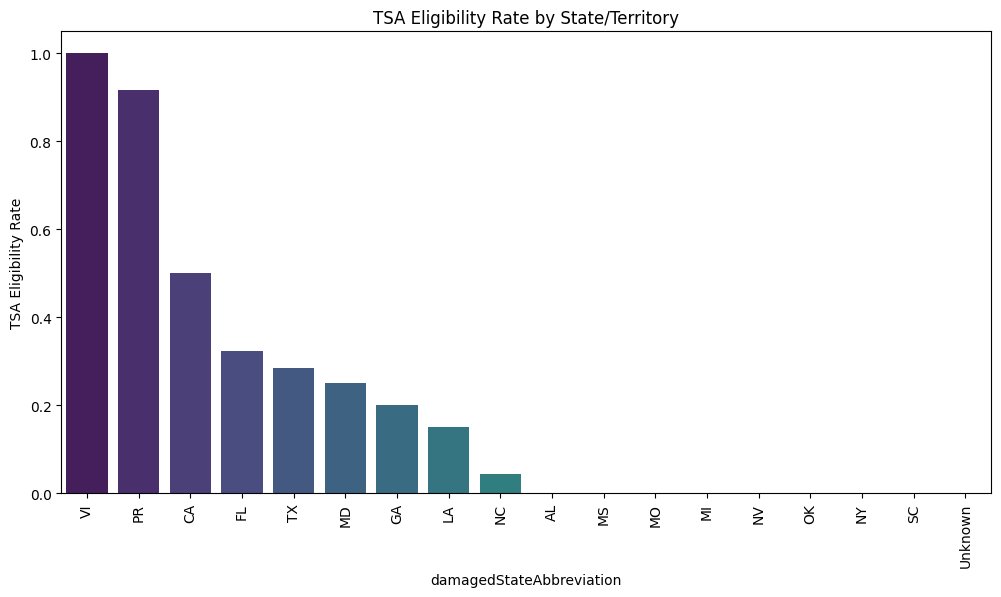

In [12]:
tsa_rate = df.groupby('damagedStateAbbreviation')['tsaEligible'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=tsa_rate.index, y=tsa_rate.values, palette='viridis')
plt.xticks(rotation=90)
plt.ylabel('TSA Eligibility Rate')
plt.title('TSA Eligibility Rate by State/Territory')
plt.show()

4b. Histogram: Distribution of repairAmount

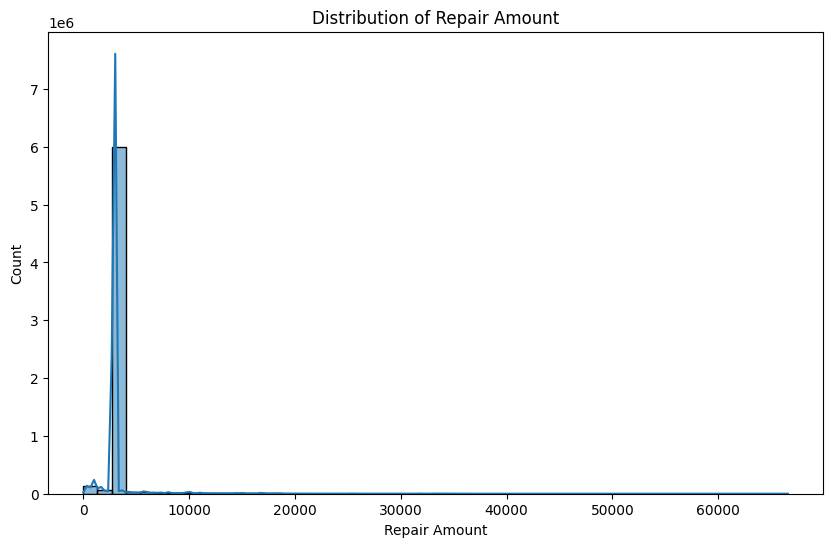

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df['repairAmount'], bins=50, kde=True)
plt.xlabel('Repair Amount')
plt.title('Distribution of Repair Amount')
plt.show()

4c. Boxplot: repairAmount across residence types


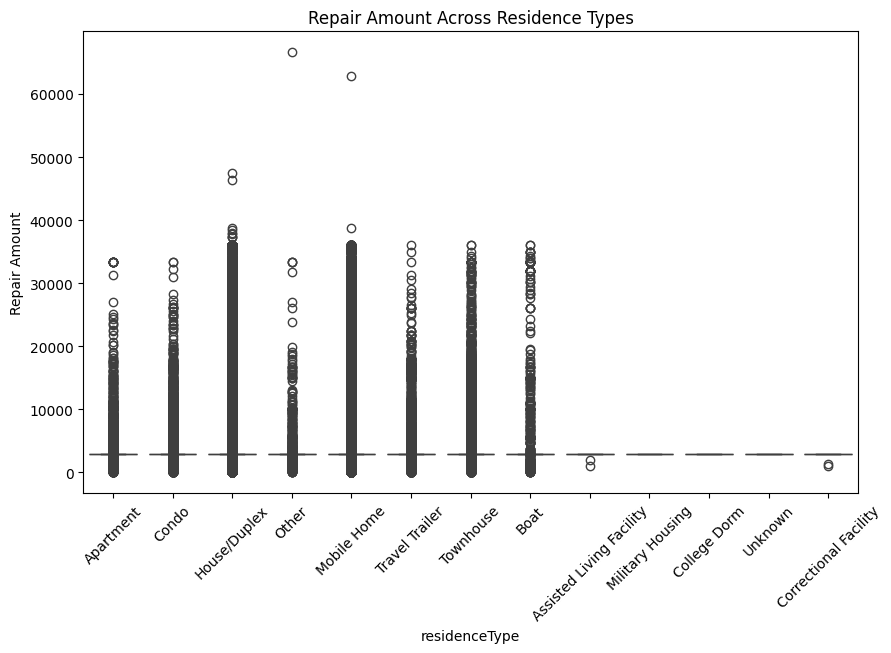

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x='residenceType', y='repairAmount', data=df)
plt.xticks(rotation=45)
plt.ylabel('Repair Amount')
plt.title('Repair Amount Across Residence Types')
plt.show()

4d. Analyst Choice: Explore effect of specialNeeds on TSA eligibility


/tmp/ipython-input-3865340925.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='specialNeeds', y='tsaEligible', data=df.groupby('specialNeeds', as_index=False)['tsaEligible'].mean(), palette='coolwarm')


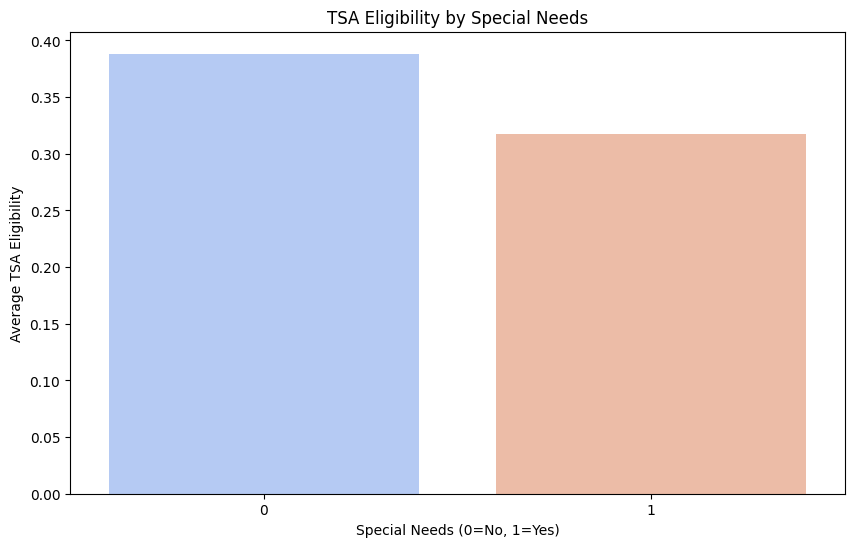

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x='specialNeeds', y='tsaEligible', data=df.groupby('specialNeeds', as_index=False)['tsaEligible'].mean(), palette='coolwarm')
plt.xlabel('Special Needs (0=No, 1=Yes)')
plt.ylabel('Average TSA Eligibility')
plt.title('TSA Eligibility by Special Needs')
plt.show()

# **Part 2**

1. Construct a 95% confidence interval for mean repairAmount of TSA-eligible vs. non-eligible households


In [16]:
import numpy as np
from scipy import stats

tsa_eligible = df[df['tsaEligible'] == 1]['repairAmount']
tsa_noneligible = df[df['tsaEligible'] == 0]['repairAmount']

conf_int_eligible = stats.t.interval(0.95, len(tsa_eligible)-1, loc=tsa_eligible.mean(), scale=stats.sem(tsa_eligible))
conf_int_noneligible = stats.t.interval(0.95, len(tsa_noneligible)-1, loc=tsa_noneligible.mean(), scale=stats.sem(tsa_noneligible))

print("95% CI for TSA-eligible households:", conf_int_eligible)
print("95% CI for TSA-noneligible households:", conf_int_noneligible)

95% CI for TSA-eligible households: (np.float64(3164.4204207544853), np.float64(3170.53139225863))
95% CI for TSA-noneligible households: (np.float64(2958.430422847072), np.float64(2961.0022569133444))


2. Compare means between two states or territories (example: 'CA' vs 'TX')

In [17]:
state1 = df[df['damagedStateAbbreviation'] == 'CA']['repairAmount']
state2 = df[df['damagedStateAbbreviation'] == 'TX']['repairAmount']

mean_state1 = state1.mean()
mean_state2 = state2.mean()
print("Mean repairAmount CA:", mean_state1)
print("Mean repairAmount TX:", mean_state2)

Mean repairAmount CA: 2867.84
Mean repairAmount TX: 3355.532141430031


3. Perform two-sample t-tests for these comparisons


In [18]:
t_stat, p_val = stats.ttest_ind(state1, state2, equal_var=False)
print("Two-sample t-test between CA and TX repairAmount:")
print("t-statistic:", t_stat)
print("p-value:", p_val)

Two-sample t-test between CA and TX repairAmount:
t-statistic: -193.9280059379936
p-value: 0.0


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


4. Interpret results in plain language


In [19]:
if p_val < 0.05:
    print("Interpretation: The mean repair amounts between CA and TX are significantly different at the 95% confidence level.")
else:
    print("Interpretation: There is no significant difference in mean repair amounts between CA and TX at the 95% confidence level.")

Interpretation: The mean repair amounts between CA and TX are significantly different at the 95% confidence level.


# **Part 3**

1.Select predictors such as grossIncome, repairAmount, destroyed, waterLevel, residenceType,
and damagedStateAbbreviation.

In [4]:
import pandas as pd

df = pd.read_csv('/content/IndividualAssistanceHousingRegistrantsLargeDisasters (2).csv')

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('Unknown')
    else:
        df[col] = df[col].fillna(df[col].median())

predictors = ['grossIncome', 'repairAmount', 'destroyed', 'waterLevel', 'residenceType', 'damagedStateAbbreviation']
X = df[predictors]
y = df['tsaEligible']

print(X.head())
print(y.head())

   grossIncome  repairAmount  destroyed  waterLevel residenceType  \
0       1800.0       2867.84          0         0.0     Apartment   
1      25752.0       2867.84          0         0.0         Condo   
2      28000.0       2867.84          0         0.0  House/Duplex   
3       2100.0       2867.84          0         0.0  House/Duplex   
4      55000.0       2867.84          0         0.0     Apartment   

  damagedStateAbbreviation  
0                       TX  
1                       FL  
2                       FL  
3                       PR  
4                       LA  
0    0
1    0
2    1
3    1
4    0
Name: tsaEligible, dtype: int64


2.Encode categorical variables and split the dataset into train/test sets.

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le_residence = LabelEncoder()
X.loc[:, 'residenceType'] = le_residence.fit_transform(X['residenceType'])

le_state = LabelEncoder()
X.loc[:, 'damagedStateAbbreviation'] = le_state.fit_transform(X['damagedStateAbbreviation'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4457133, 6)
X_test shape: (1910201, 6)
y_train shape: (4457133,)
y_test shape: (1910201,)


3.Train a Decision Tree Classifier and a Random Forest Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

rf_model = RandomForestClassifier(n_estimators=20, random_state=42)  # Reduced n_estimators for faster execution
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Decision Tree and Random Forest models trained successfully!")

Decision Tree and Random Forest models trained successfully!


4.Compare accuracy, precision, recall, and confusion matrices

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

print("Decision Tree Metrics:")
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_cm = confusion_matrix(y_test, y_pred_dt)

print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("Confusion Matrix:\n", dt_cm)
print(classification_report(y_test, y_pred_dt))

print("\nRandom Forest Metrics:")
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_cm = confusion_matrix(y_test, y_pred_rf)

print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("Confusion Matrix:\n", rf_cm)
print(classification_report(y_test, y_pred_rf))


Decision Tree Metrics:
Accuracy: 0.7610727876281083
Precision: 0.836697775965068
Recall: 0.4731445968331667
Confusion Matrix:
 [[1105058   68066]
 [ 388333  348744]]
              precision    recall  f1-score   support

           0       0.74      0.94      0.83   1173124
           1       0.84      0.47      0.60    737077

    accuracy                           0.76   1910201
   macro avg       0.79      0.71      0.72   1910201
weighted avg       0.78      0.76      0.74   1910201


Random Forest Metrics:
Accuracy: 0.7627155466885422
Precision: 0.8334994077722837
Recall: 0.4811763221481609
Confusion Matrix:
 [[1102276   70848]
 [ 382413  354664]]
              precision    recall  f1-score   support

           0       0.74      0.94      0.83   1173124
           1       0.83      0.48      0.61    737077

    accuracy                           0.76   1910201
   macro avg       0.79      0.71      0.72   1910201
weighted avg       0.78      0.76      0.74   1910201



5.Discuss which model generalizes best
Looking at the results, the Random Forest definitely seems to generalize better than the Decision Tree. Both models have similar accuracy, around 76%, and pretty high precision, but the Random Forest has a slightly better recall, meaning it catches more of the TSA-eligible households. Since it’s made up of multiple trees, it’s less likely to overfit and is more reliable on new data, while the single Decision Tree tends to miss more true positives. Overall, the Random Forest just does a better job balancing precision and recall, so it’s the better choice for predicting TSA eligibility.

# **Part 4**

1.Build a Streamlit app that displays:

In [2]:
import pandas as pd

df = pd.read_csv('/content/IndividualAssistanceHousingRegistrantsLargeDisasters (2).csv')

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('Unknown')
    else:
        df[col] = df[col].fillna(df[col].median())

1a.Histogram

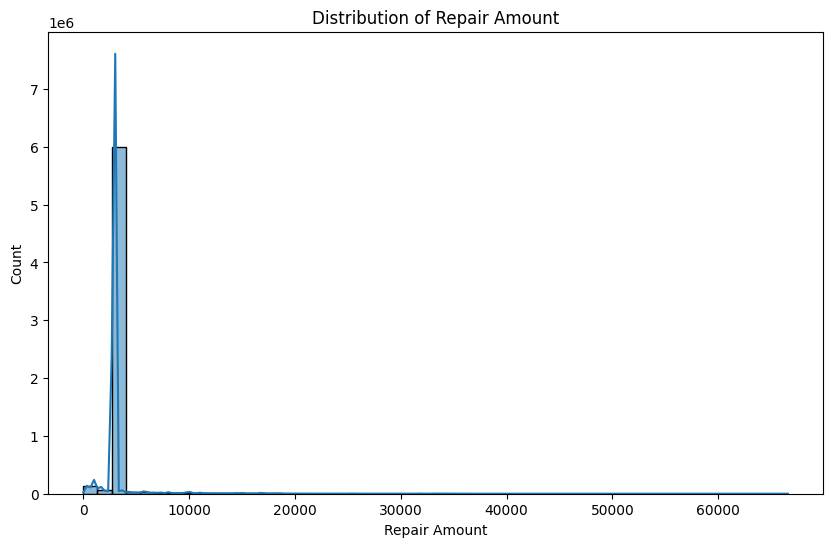

Insight: Most repair amounts are on the lower end, with a long tail of higher-cost repairs.


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['repairAmount'], bins=50, kde=True)
plt.xlabel('Repair Amount')
plt.ylabel('Count')
plt.title('Distribution of Repair Amount')
plt.show()

print("Insight: Most repair amounts are on the lower end, with a long tail of higher-cost repairs.")

1b.Boxplot

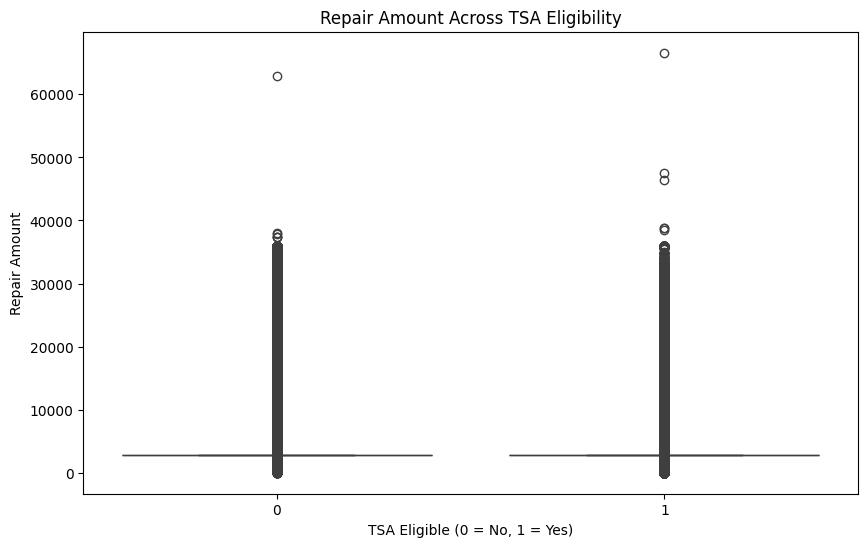

Insight: TSA-eligible applicants generally have higher repair costs, which aligns with needing more assistance.


In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(x='tsaEligible', y='repairAmount', data=df)
plt.xlabel('TSA Eligible (0 = No, 1 = Yes)')
plt.ylabel('Repair Amount')
plt.title('Repair Amount Across TSA Eligibility')
plt.show()

print("Insight: TSA-eligible applicants generally have higher repair costs, which aligns with needing more assistance.")